In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import VotingClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import tree
import xgboost as xgb
import lightgbm as lgb
import os



In [142]:
df=pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/test.csv')
df_submission=pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/sample_submission.csv')

In [143]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
df.shape


(1460, 81)

In [144]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [145]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
                 ... 
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [146]:
df['LotFrontage'].mean()

70.04995836802665

In [147]:
null_columns=df.columns[df.isnull().any()]
null_columns_test=df_test.columns[df_test.isnull().any()]
null_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [148]:
for item in null_columns:
    if df[item].dtype == 'float64':
        df.fillna((df[item].mean()),  inplace = True )
    elif df[item].dtype == 'O':
        df.fillna(df[item].value_counts().index[0], inplace = True)
for item in null_columns_test:
    if df_test[item].dtype == 'float64':
        df_test.fillna((df_test[item].mean()),  inplace = True )
    elif df_test[item].dtype == 'O':
        df_test.fillna(df_test[item].value_counts().index[0], inplace = True)

In [149]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,RL,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,RL,MnPrv,RL,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,RL,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,RL,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,RL,RL,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,RL,MnPrv,RL,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,RL,RL,RL,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,RL,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,RL,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,RL,RL,RL,0,1,2010,WD,Normal
5,1466,60,RL,75,10000,Pave,RL,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,RL,RL,RL,0,4,2010,WD,Normal
6,1467,20,RL,RL,7980,Pave,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,RL,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,RL,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63,8402,Pave,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,RL,RL,RL,0,5,2010,WD,Normal
8,1469,20,RL,85,10176,Pave,RL,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,RL,RL,RL,0,2,2010,WD,Normal
9,1470,20,RL,70,8400,Pave,RL,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,RL,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,RL,MnPrv,RL,0,4,2010,WD,Normal


In [150]:
df.isnull().sum().sum()

0

In [151]:
objectColumns = df.select_dtypes(['object']).columns
objectColumns_test=df_test.select_dtypes(['object']).columns

In [152]:
objectColumns 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [153]:
for item in objectColumns:
    df[item] = df[item].astype('category')
for item in objectColumns_test:
    df_test[item] = df_test[item].astype('category')

In [154]:
categoryColumns = df.select_dtypes(['category']).columns
df[categoryColumns] = df[categoryColumns].apply(lambda x: x.cat.codes)

categoryColumns = df_test.select_dtypes(['category']).columns
df_test[categoryColumns] = df_test[categoryColumns].apply(lambda x: x.cat.codes)
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,56,11622,1,2,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,11,13,2,0,3,4,1,4,4,3,5,227,3,31,172,202,0,4,1,3,896,0,0,896,0,0,1,0,2,1,4,5,7,0,4,1,46,3,1,348,4,5,2,140,0,0,0,120,0,2,2,2,0,6,2010,9,4
1,1462,20,3,57,14267,1,2,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,12,14,1,58,3,4,1,4,4,3,0,478,6,0,275,477,0,4,1,3,1329,0,0,1329,0,0,1,1,3,1,2,6,7,0,4,1,43,3,1,67,4,5,2,393,36,0,0,0,0,2,4,0,12500,6,2010,9,4
2,1463,60,3,50,13830,1,2,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,11,13,2,0,3,4,2,2,4,3,2,417,6,0,70,234,0,2,1,3,928,701,0,1629,0,0,2,1,3,1,4,6,7,1,5,1,82,0,2,179,4,5,2,212,34,0,0,0,0,2,2,2,0,3,2010,9,4
3,1464,60,3,54,9978,1,2,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,11,13,1,6,3,4,2,4,4,3,2,310,6,0,212,233,0,0,1,3,926,678,0,1604,0,0,2,1,3,1,2,7,7,1,2,1,83,0,2,168,4,5,2,360,36,0,0,0,0,2,4,2,0,6,2010,9,4
4,1465,120,3,19,5005,1,2,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0,2,4,2,2,4,3,0,107,6,0,601,455,0,0,1,3,1280,0,0,1280,0,0,2,0,2,1,2,5,7,0,4,1,77,1,2,198,4,5,2,0,82,0,0,144,0,2,4,2,0,1,2010,9,4
5,1466,60,3,51,10000,1,2,0,3,0,0,0,8,2,2,0,4,6,5,1993,1994,1,0,6,6,2,0,3,4,2,2,4,3,6,0,6,0,490,130,0,2,1,3,763,892,0,1655,0,0,2,1,3,1,4,7,7,1,5,1,78,0,2,146,4,5,2,157,84,0,0,0,0,2,4,2,0,4,2010,9,4
6,1467,20,3,115,7980,1,2,0,3,0,4,0,8,2,2,0,2,6,7,1992,2007,1,0,6,6,2,0,3,2,2,2,4,3,0,484,6,0,144,390,0,0,1,3,1187,0,0,1187,1,0,2,0,3,1,4,6,7,0,4,1,77,0,2,132,4,5,2,483,21,0,0,0,0,2,0,3,500,3,2010,9,4
7,1468,60,3,39,8402,1,2,0,3,0,4,0,8,2,2,0,4,6,5,1998,1998,1,0,11,13,2,0,3,4,2,2,4,3,6,0,6,0,505,141,0,2,1,3,789,676,0,1465,0,0,2,1,3,1,4,7,7,1,2,1,83,0,2,115,4,5,2,0,75,0,0,0,0,2,4,2,0,5,2010,9,4
8,1469,20,3,61,10176,1,2,3,3,0,4,0,8,2,2,0,2,7,5,1990,1990,1,0,6,6,2,0,3,4,2,2,4,1,2,330,6,0,442,465,0,2,1,3,1341,0,0,1341,1,0,1,1,2,1,2,5,7,1,3,1,75,3,2,198,4,5,2,192,0,0,0,0,0,2,4,2,0,2,2010,9,4
9,1470,20,3,46,8400,1,2,3,3,0,0,0,12,2,2,0,2,4,5,1970,1970,1,0,8,9,2,0,3,4,1,4,4,3,0,426,5,15,0,202,0,4,1,3,882,0,0,882,1,0,1,0,2,1,4,4,7,0,4,1,55,0,2,213,4,5,2,240,0,0,0,0,0,2,2,2,0,4,2010,9,4


In [155]:
y = df['SalePrice']
x = df.drop(['Id', 'SalePrice'], axis = 1)
x_test=df_test.drop(['Id'], axis = 1)

In [156]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [157]:
print(x_train.shape)
print(x_cv.shape)

(1095, 79)
(365, 79)


In [158]:
linearRegression = LinearRegression()
model=linearRegression.fit(x_train, y_train)

In [159]:

linearRegression.score(x_train, y_train)

0.876977817524268

In [160]:
prediction_linearRegression = model.predict(x_test)
print(prediction_linearRegression)


[-444846.66749731 -340507.45409451 -376897.26562465 ... -408803.31963898
 -429450.73768349 -307305.24310023]


In [161]:
mean_squared_error(y_cv, prediction_linearRegression)

ValueError: Found input variables with inconsistent numbers of samples: [365, 1459]

In [162]:
print(prediction_linearRegression)

[-444846.66749731 -340507.45409451 -376897.26562465 ... -408803.31963898
 -429450.73768349 -307305.24310023]


In [163]:
print(linearRegression.score(x_cv, y_cv))
print(r2_score(y_cv, prediction_linearRegression))

0.8181556811730389


ValueError: Found input variables with inconsistent numbers of samples: [365, 1459]

In [164]:
ridgeRegression = Ridge()
ridgeRegression.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
ridgeRegression.score(x_train, y_train)

0.874684832331018

In [166]:
prediction_ridgeRegression = ridgeRegression.predict(x_cv)


In [167]:
mean_squared_error(y_cv, prediction_ridgeRegression)

1168734897.2871532

In [168]:
r2_score(y_cv, prediction_ridgeRegression)

0.8331644059448211

In [169]:
lassoRegression = Lasso(alpha = 1, max_iter = 5000)
lassoRegression.fit(x_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [170]:
lassoRegression.score(x_train, y_train)

0.876977451681516

In [171]:
prediction_lassoRegression = lassoRegression.predict(x_cv)
mean_squared_error(y_cv, prediction_lassoRegression)


1272962959.075599

In [172]:
r2_score(y_cv, prediction_lassoRegression)

0.8182859671764928

In [173]:
elasticNet = ElasticNet(alpha = 1, l1_ratio = 0.9, max_iter = 5000, normalize = False)
elasticNet.fit(x_train, y_train)

/home/bagrat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
elasticNet.score(x_train, y_train)

0.8415520649022019

In [175]:
prediction_elasticNet = elasticNet.predict(x_cv)
mean_squared_error(y_cv, prediction_elasticNet)

1022161966.93462

In [176]:
r2_score(y_cv, prediction_elasticNet)

0.8540875271458175

In [177]:
votingClassifier = VotingClassifier(estimators = [('Linear Regression', linearRegression), ('Ridge Regression', ridgeRegression), ('Lasso Regression', lassoRegression), ('Elastic Net Regression', elasticNet)], voting = 'hard')
baggingRegressor = BaggingRegressor(tree.DecisionTreeRegressor(random_state = 1))
baggingRegressor.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [178]:
baggingRegressor.score(x_train, y_train)

0.9616160402677398

In [179]:
prediction_baggingRegressor = baggingRegressor.predict(x_cv)
mean_squared_error(y_cv, prediction_baggingRegressor)

764734253.0717262

In [180]:
r2_score(y_cv, prediction_baggingRegressor)

0.8908350441988917

In [181]:
randomForestRegressor = RandomForestRegressor(n_estimators = 30)
randomForestRegressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [182]:
randomForestRegressor.score(x_train, y_train)

0.9752094810112251

In [183]:
prediction_randomForest = randomForestRegressor.predict(x_cv)
mean_squared_error(y_cv, prediction_randomForest)

766946830.52358

In [184]:
r2_score(y_cv, prediction_randomForest)

0.8905192012524459

In [185]:
adaBoostRegressor = AdaBoostRegressor(n_estimators = 60)
adaBoostRegressor.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=60, random_state=None)

In [186]:
adaBoostRegressor.score(x_train, y_train)

0.8843951078115784

In [187]:
prediction_adaBoost = adaBoostRegressor.predict(x_cv)

In [188]:
mean_squared_error(y_cv, prediction_adaBoost)

1058891450.45049

In [189]:
r2_score(y_cv, prediction_adaBoost)

0.848844434622497

In [190]:
gradientBoostingRegressor = GradientBoostingRegressor(max_depth = 4)
gradientBoostingRegressor.fit(x_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [191]:
gradientBoostingRegressor.score(x_train, y_train)

0.9855782740168735

In [192]:
prediction_gradientBoost = gradientBoostingRegressor.predict(x_cv)
mean_squared_error(y_cv, prediction_gradientBoost)

618563217.7770754

In [193]:
r2_score(y_cv, prediction_gradientBoost)

0.9117007953317184

In [231]:
xgBoost = xgb.XGBRegressor(max_depth = 4, learning_rate = 0.1, n_estimators = 500)
xgBoost.fit(x_train, y_train)

/home/bagrat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [232]:
xgBoost.score(x_train, y_train)

0.9986497151064239

In [235]:
prediction_xgBoost = xgBoost.predict(x_test)
prediction_xgBoost

array([119636.73, 134878.  , 181744.69, ..., 145260.06, 124065.96,
       217103.56], dtype=float32)

In [237]:
pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_xgBoost}).to_csv('2017-02-28.csv', index =False)   

In [197]:
r2_score(y_cv, prediction_xgBoost)

0.9069736358770487

In [198]:
params = {'learning_rate': 0.1}
train_data = lgb.Dataset(x_train, label = y_train)
lgbRegressor = lgb.train(params, train_data, 100)

In [239]:
prediction_lgbRegressor = lgbRegressor.predict(x_test)
prediction_lgbRegressor
pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_lgbRegressor}).to_csv('new', index =False)   

In [200]:
r2_score(y_cv, prediction_lgbRegressor)

0.8913938262597687

In [201]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(512,activation='relu',
         input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


In [202]:
model.fit(x_train,y_train,validation_split=0.2,epochs=20,batch_size=1)

Train on 876 samples, validate on 219 samples
Epoch 1/20
876/876 [==============================] - 3s 3ms/step - loss: 16423209744.8756 - mean_absolute_error: 53764.1023 - val_loss: 2041834748.6085 - val_mean_absolute_error: 35777.9275
Epoch 2/20
876/876 [==============================] - 3s 3ms/step - loss: 3284006155.7588 - mean_absolute_error: 36917.8228 - val_loss: 1779620595.7819 - val_mean_absolute_error: 29904.1891
Epoch 3/20
876/876 [==============================] - 3s 3ms/step - loss: 3348668390.2954 - mean_absolute_error: 34201.6067 - val_loss: 1263441030.1468 - val_mean_absolute_error: 26275.3212
Epoch 4/20
876/876 [==============================] - 3s 3ms/step - loss: 2897074098.4776 - mean_absolute_error: 34257.2972 - val_loss: 1308544439.6727 - val_mean_absolute_error: 24895.1169
Epoch 5/20
876/876 [==============================] - 3s 3ms/step - loss: 2971294806.9703 - mean_absolute_error: 34580.6340 - val_loss: 3566920734.2257 - val_mean_absolute_error: 48988.8998
Epo

In [211]:
b=model.predict(x_test)


array([[ 90189.24 ],
       [ 49261.395],
       [128341.87 ],
       ...,
       [118413.914],
       [ 67796.29 ],
       [159513.98 ]], dtype=float32)

In [244]:
b=b.reshape(1459)
list(b)

[90189.24,
 49261.395,
 128341.87,
 132724.73,
 108295.49,
 123120.63,
 114717.86,
 105633.58,
 111746.6,
 89751.0,
 124206.65,
 75030.945,
 71524.1,
 100949.69,
 65224.984,
 185028.23,
 125977.72,
 147029.39,
 140656.7,
 237463.84,
 188345.08,
 111054.39,
 94390.41,
 98676.46,
 99015.055,
 126086.22,
 200323.22,
 136197.14,
 111418.41,
 132833.28,
 126242.75,
 72853.805,
 103810.27,
 180126.14,
 180081.27,
 131489.58,
 119928.195,
 98334.49,
 97508.38,
 99921.68,
 105806.01,
 88264.38,
 158678.97,
 159637.83,
 145245.62,
 135179.23,
 193208.69,
 139686.95,
 113289.63,
 111134.23,
 96928.71,
 127541.96,
 118653.1,
 113032.54,
 144258.78,
 93580.76,
 83766.914,
 113415.836,
 140141.89,
 90931.54,
 93869.945,
 117685.96,
 86353.586,
 73938.336,
 69369.43,
 67034.26,
 78219.85,
 100573.35,
 96101.74,
 133658.53,
 104581.51,
 70170.305,
 103550.82,
 83748.73,
 110341.79,
 74751.914,
 72020.516,
 105302.13,
 147934.73,
 122515.68,
 108333.2,
 109214.086,
 125810.125,
 62371.863,
 74066.32,


In [245]:
pd.DataFrame({'Id': df_test.Id, 'SalePrice': list(b)}).to_csv('new1', index =False)   

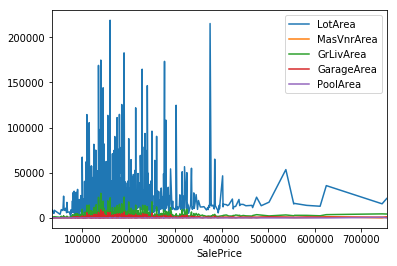

In [20]:
SaleType_df = df[[x for x in df.columns if 'Area' in x] + ['SalePrice']]
SaleType_df.groupby('SalePrice').sum().plot()

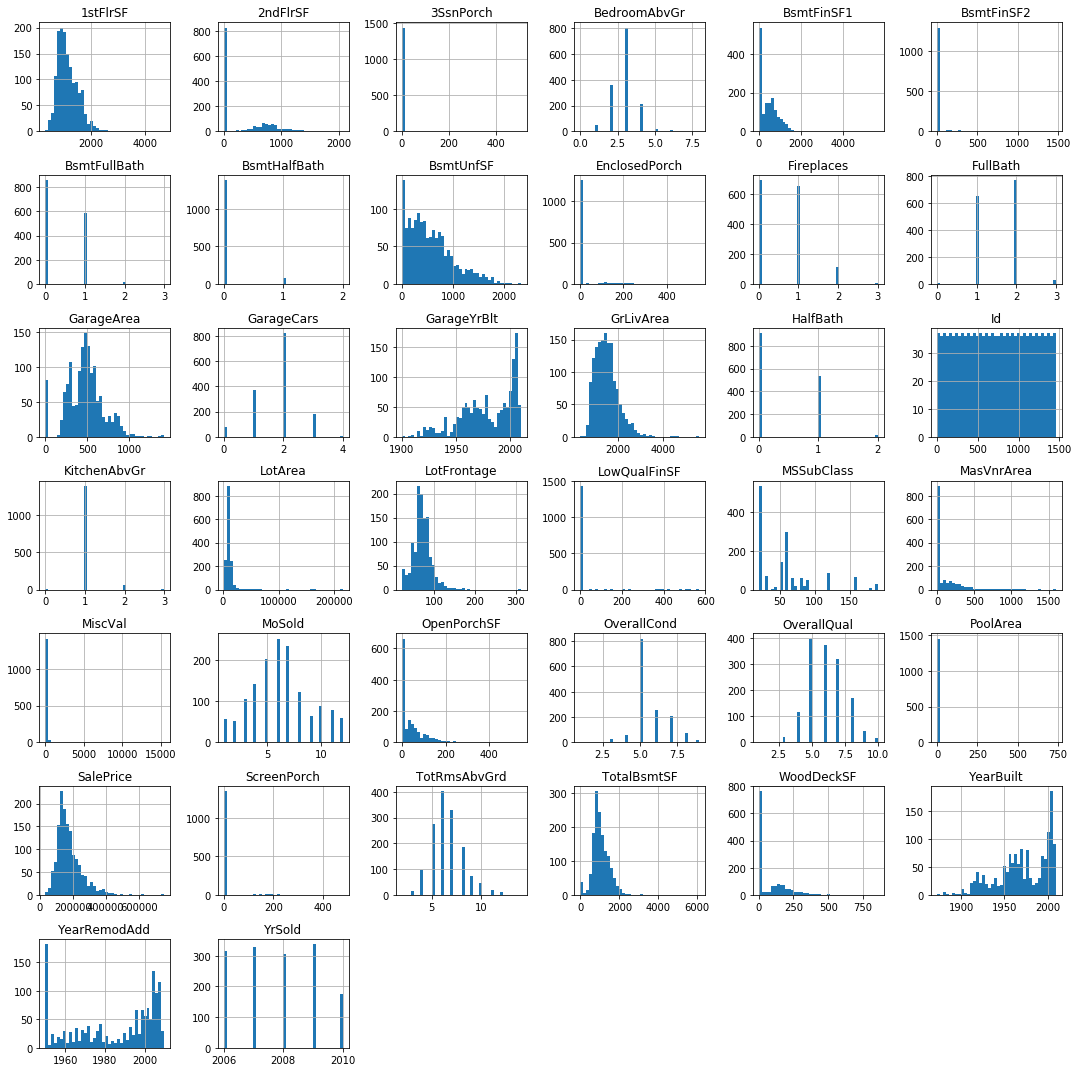

In [31]:
from matplotlib import pyplot as plt
df.hist(figsize = (15, 15), bins = 40)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Skew of Variables')

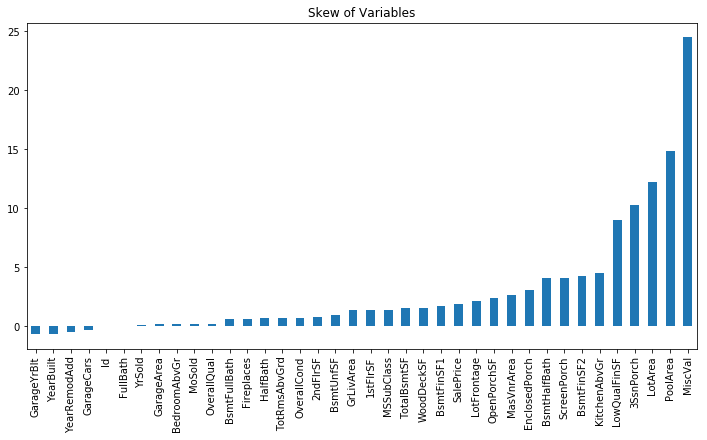

In [22]:
plt.figure(figsize = (12, 6))
df.skew().sort_values().plot(kind = 'bar', color = 'C0')
plt.title('Skew of Variables')

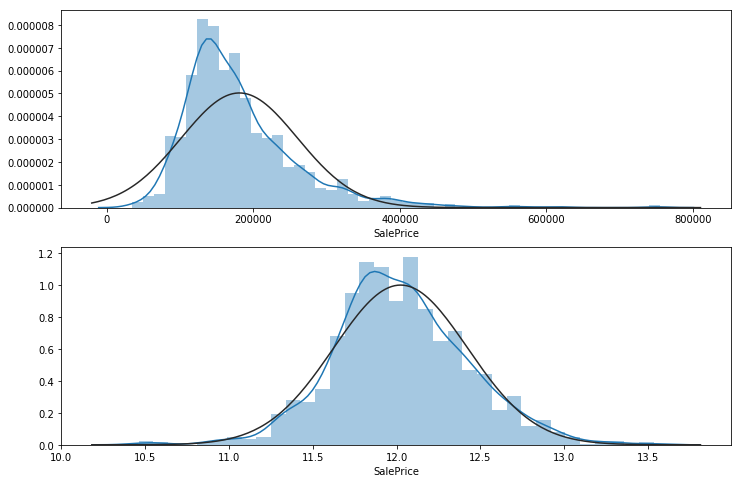

In [23]:
from scipy.stats import norm
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize = (12, 8)) 

sns.distplot(df['SalePrice'], fit = norm, ax = ax[0])
sns.distplot(np.log(df['SalePrice']), fit = norm, ax = ax[1])
plt.show()

/home/bagrat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bagrat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


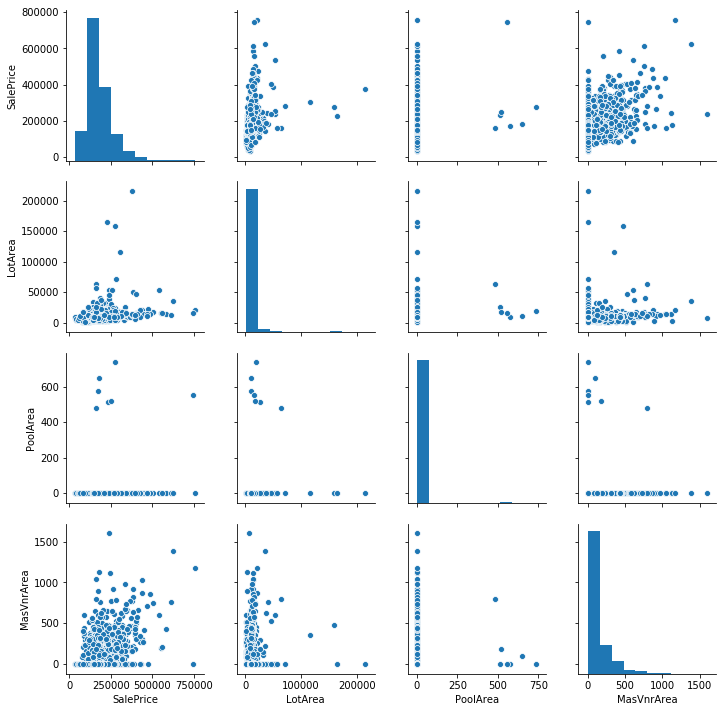

In [24]:
cols = ['SalePrice', 'LotArea', 'PoolArea', 'MasVnrArea']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

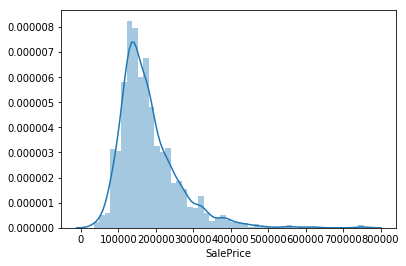

In [25]:
sns.distplot(df.SalePrice)

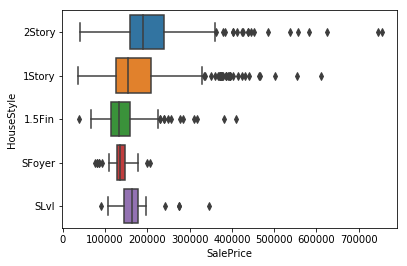

In [26]:
HouseStyle = df.HouseStyle.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="HouseStyle", x="SalePrice", data=df[df.HouseStyle.isin(HouseStyle)], orient="h")

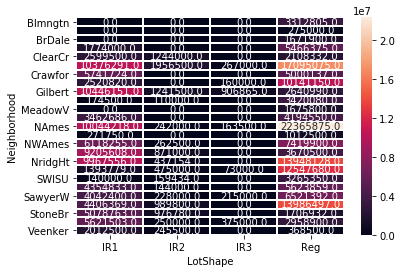

In [27]:
Neighborhood_LotShape_SalePrice = df.pivot_table(
                        index='Neighborhood', 
                        columns='LotShape', 
                        values='SalePrice', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(Neighborhood_LotShape_SalePrice, annot=True, fmt=".1f", linewidths=1)

In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [29]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

KeyError: 'Year_of_Release'

In [35]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
